# BiSpectral Representation Method
Author: Lohit Vandanapu
Date: August 19, 2018

In this example, the BiSpectral Representation Method is used to generate stochastic processes from a prescribed Power Spectrum and associated Bispectrum. This example illustrates how to use the BSRM class for one dimensional case and compare the statistics of the generated stochastic processes with the expected values.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the BSRM class from the StochasticProcesses module of UQpy.

In [15]:
from UQpy.StochasticProcess import BSRM
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
plt.style.use('seaborn')

The input parameters necessary for the generation of the stochastic processes are given below:

In [16]:
n_sim = 10000  # Num of samples

n = 1 # Num of dimensions

# Input parameters
T = 60  # Time(1 / T = dw)
nt = 1200  # Num.of Discretized Time
F = 1 / T * nt / 2  # Frequency.(Hz)
nf = 600  # Num of Discretized Freq.

# # Generation of Input Data(Stationary)
dt = T / nt
t = np.linspace(0, T - dt, nt)
df = F / nf
f = np.linspace(0, F - df, nf)

Defining the Power Spectral Density(S)

In [17]:
S = 32 * 1 / np.sqrt(2 * np.pi) * np.exp(-1 / 2 * f ** 2)

In [18]:
# Generating the 2 dimensional mesh grid
fx = f
fy = f
Fx, Fy = np.meshgrid(f, f)

b = 95 * 2 * 1 / (2 * np.pi) * np.exp(2 * (-1 / 2 * (Fx ** 2 + Fy ** 2)))
B_Real = b
B_Imag = b

B_Real[0, :] = 0
B_Real[:, 0] = 0
B_Imag[0, :] = 0
B_Imag[:, 0] = 0

Defining the Bispectral Density(B)

In [19]:
B_Complex = B_Real + 1j * B_Imag
B_Ampl = np.absolute(B_Complex)

Make sure that the input parameters are in order to prevent aliasing

In [20]:
t_u = 2*np.pi/2/F

if dt>t_u:
    print('Error')

In [21]:
BSRM_object = BSRM(n_sim, S, B_Complex, [dt], [df], [nt], [nf])
samples = BSRM_object.samples

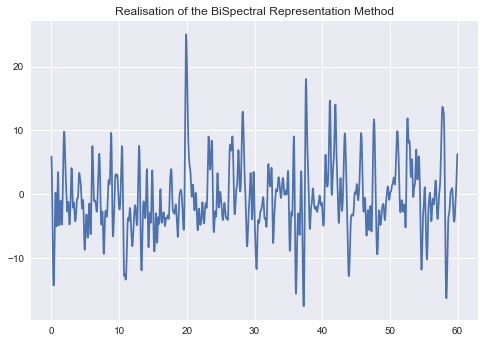

In [22]:
fig, ax = plt.subplots()
plt.title('Realisation of the BiSpectral Representation Method')
plt.plot(t, samples[0, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

In [23]:
print('The mean of the samples is ', np.mean(samples), 'whereas the expected mean is 0.000')
print('The variance of the samples is ', np.var(samples), 'whereas the expected variance is ', np.sum(S)*df*2)
print('The skewness of the samples is ', np.mean(skew(samples, axis=0)), 'whereas the expected skewness is ', np.sum(B_Real)*df**2*6/(np.sum(S)*df*2)**(3/2))


The mean of the samples is  -0.0037348968305513214 whereas the expected mean is 0.000
The variance of the samples is  32.219677596088914 whereas the expected variance is  32.2127692162141
The skewness of the samples is  0.7618236263274336 whereas the expected skewness is  0.7648330551352043
